In [148]:
import numpy as np
import pandas as pd

In [149]:
from os import listdir

filepaths = [f for f in listdir("./") if f.endswith('.csv')]
us_census = pd.concat(map(pd.read_csv, filepaths), ignore_index = True)

In [150]:
us_census.drop(columns = ['Unnamed: 0'], inplace=True)

In [151]:
us_census[['Male','Female']] = us_census.GenderPop.str.split("_",expand=True) 

In [152]:
us_census.drop(columns = ['GenderPop'], inplace=True)

In [153]:
us_census['Income'] = us_census.Income.str.strip('$')

In [154]:
us_census = us_census.replace('%','', regex=True)

In [155]:
us_census = us_census.replace('F','', regex=True)

In [156]:
us_census = us_census.replace('M','', regex=True)

In [157]:
us_census.loc[:,'Hispanic':'Income'] = round(us_census.loc[:,'Hispanic':'Income'].apply(pd.to_numeric),2)

In [158]:
us_census['Male'] = us_census['Male'].astype(int)

In [159]:
us_census.drop(columns = ['Female'], inplace=True)

In [160]:
us_census['Female'] = us_census['TotalPop'] - us_census['Male']

In [161]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male          int32
Female        int64
dtype: object

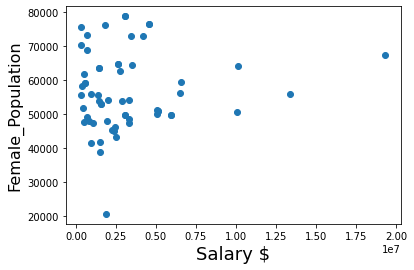

In [162]:
import matplotlib.pyplot as plt
plt.scatter(us_census['Female'],us_census['Income'])
plt.xlabel('Salary $', fontsize=18)
plt.ylabel('Female_Population', fontsize=16)
plt.show()

In [163]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [164]:
us_census.drop_duplicates(inplace= True)

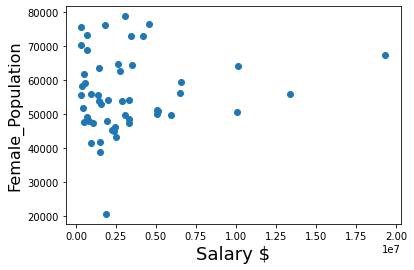

In [165]:
plt.scatter(us_census['Female'],us_census['Income'])
plt.xlabel('Salary $', fontsize=18)
plt.ylabel('Female_Population', fontsize=16)
plt.show()

In [166]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
19    False
20    False
21    False
22    False
23    False
25    False
26    False
27    False
28    False
29    False
31    False
32    False
33    False
34    False
35    False
37    False
38    False
39    False
40    False
41    False
43    False
44    False
45    False
46    False
47    False
49    False
50    False
51    False
52    False
53    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

### ploting histograms for races 

In [167]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239
7,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615
8,Delaware,926454,8.82,64.63,20.74,0.26,3.27,NaN,61827.98,448413,478041
9,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810
10,lorida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009,10045763


In [168]:
us_census.describe()

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,47.000000,51.000000,5.100000e+01,5.100000e+01
mean,6.265067e+06,12.648039,67.261176,11.945098,1.547843,3.645098,0.307021,55922.667255,3.081423e+06,3.183644e+06
std,7.017552e+06,15.697733,18.394281,11.854634,3.105255,5.293489,1.278634,11479.923759,3.464446e+06,3.553646e+06
min,6.266040e+05,1.290000,0.770000,0.090000,0.000000,0.080000,0.000000,20720.540000,3.066740e+05,3.180310e+05
25%,1.860392e+06,4.675000,56.805000,3.055000,0.195000,1.245000,0.025000,48358.540000,9.216185e+05,9.387740e+05
50%,4.397353e+06,8.460000,71.140000,8.200000,0.360000,2.320000,0.040000,54207.820000,2.164208e+06,2.233145e+06
75%,6.845525e+06,13.415000,79.635000,17.370000,1.035000,3.845000,0.085000,63889.835000,3.393406e+06,3.476838e+06
max,3.842146e+07,98.890000,93.980000,51.780000,16.390000,36.590000,8.760000,78765.400000,1.908714e+07,1.933433e+07


In [169]:
histo =  round(us_census.loc[:,'Hispanic':'Pacific'].apply(lambda x:x*us_census['TotalPop']/100))

In [170]:
histo.head()

,Hispanic,White,Black,Native,Asian,Pacific
0,181148.0,2989188.0,1509569.0,21738.0,50722.0,1449.0
1,43342.0,446699.0,20901.0,120200.0,39969.0,7774.0
2,1964018.0,3793869.0,255714.0,289588.0,191288.0,11291.0
3,184001.0,2104469.0,561172.0,15383.0,33724.0,4437.0
4,14327364.0,15453113.0,2182339.0,157528.0,5014001.0,134475.0


In [171]:
histo.fillna(method='bfill', inplace = True)

In [172]:
histo.astype(int)

,Hispanic,White,Black,Native,Asian,Pacific
0,181148,2989188,1509569,21738,50722,1449
1,43342,446699,20901,120200,39969,7774
2,1964018,3793869,255714,289588,191288,11291
3,184001,2104469,561172,15383,33724,4437
4,14327364,15453113,2182339,157528,5014001,134475
5,1096957,3689955,187401,30090,140419,719
7,560543,2431893,371898,4671,144448,719
8,81713,598767,192147,2409,30295,194
9,59374,214317,335267,1295,21885,194
10,4192408,11606722,2980264,41256,447924,9823


In [173]:
histo['total_pop'] =us_census['TotalPop']
histo['state'] = us_census['State']

array([[<AxesSubplot:title={'center':'Hispanic'}>]], dtype=object)

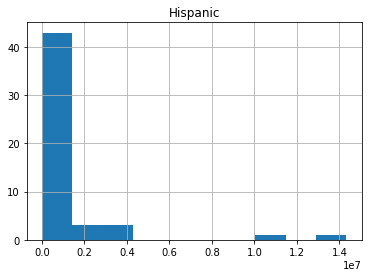

In [175]:
histo.hist(column='Hispanic')

array([[<AxesSubplot:title={'center':'White'}>]], dtype=object)

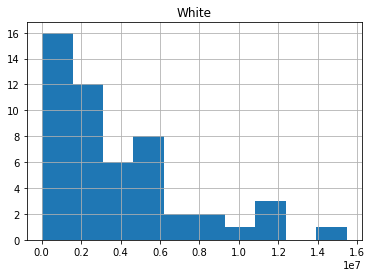

In [176]:
histo.hist(column='White')

array([[<AxesSubplot:title={'center':'Black'}>]], dtype=object)

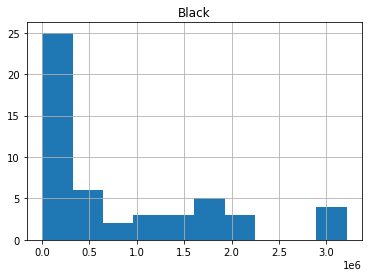

In [177]:
histo.hist(column='Black')

array([[<AxesSubplot:title={'center':'Native'}>]], dtype=object)

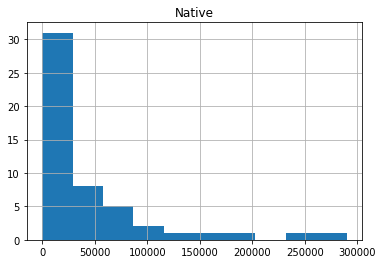

In [178]:
histo.hist(column='Native')

array([[<AxesSubplot:title={'center':'Asian'}>]], dtype=object)

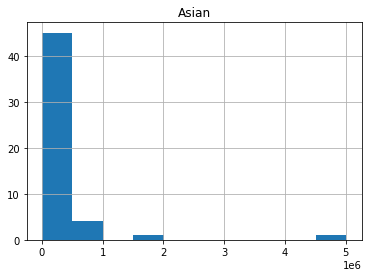

In [179]:
histo.hist(column='Asian')

array([[<AxesSubplot:title={'center':'Pacific'}>]], dtype=object)

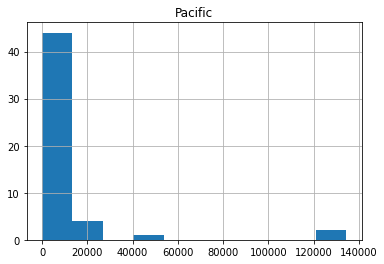

In [181]:
histo.hist(column='Pacific')